In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0","Booking_ID"], inplace=True)

In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7661)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(21359, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

### OUR DATA IS QUITE IMBALANCE

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [ ]:
cat_columns = ["type_of_meal_plan","market_segment_type","room_type_reserved","booking_status"]

num_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','required_car_parking_space','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',]

In [15]:
## data Analysis
data = df.copy()
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,3,0,0,1,Meal Plan 1,0,Room_Type 4,65,2018,6,21,Online,0,0,0,132.30,0,Canceled
29013,2,0,2,3,Meal Plan 1,0,Room_Type 1,86,2018,6,17,Online,0,0,0,126.90,1,Not_Canceled
29014,2,0,0,2,Meal Plan 1,0,Room_Type 4,0,2018,10,12,Online,0,0,0,139.50,1,Not_Canceled
29015,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled


## UNIVARIATE ANALYSIS

In [16]:
def num_plot_dist(df, num_columns):
    fig , ax = plt.subplots(len(num_columns), 2 , figsize=(15,len(num_columns)*5))
    if len(num_columns) == 1:
        ax =[ax]
    for i , col in enumerate(num_columns):
        sns.histplot(data=df , x = col , ax = ax[i][0], kde = True , palette="Blues")
        ax[i][0].set_title(f"Histogram for {col}")

        sns.boxplot(data=df , x = col , ax = ax[i][1], palette="Blues")
        ax[i][1].set_title(f"Boxplot for {col}")

    plt.tight_layout()
    plt.show()

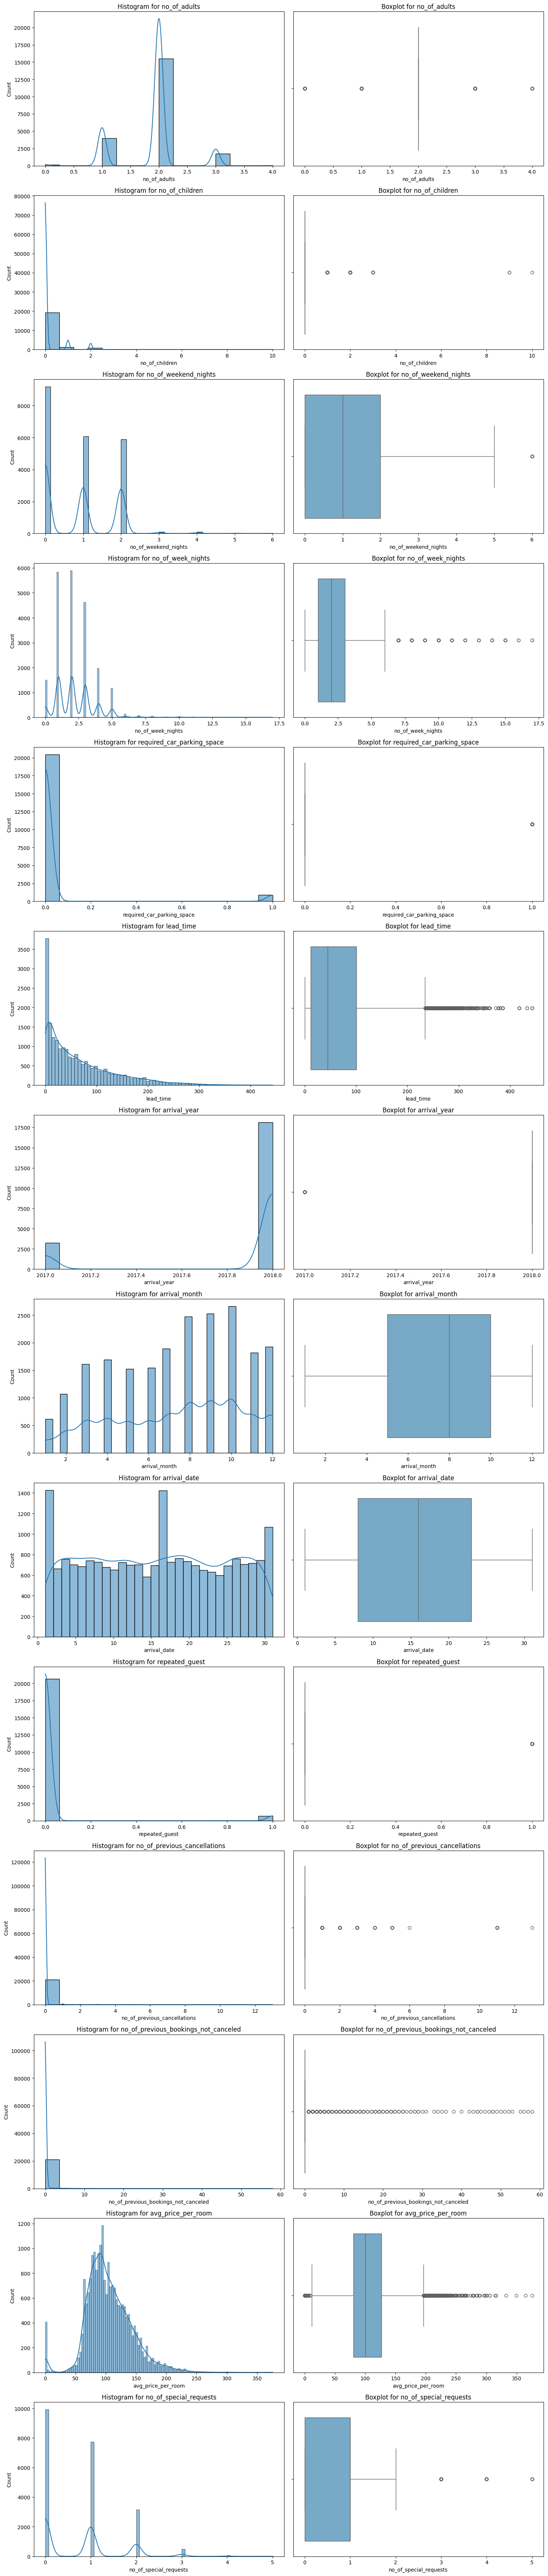

In [17]:
num_plot_dist(data , num_columns)

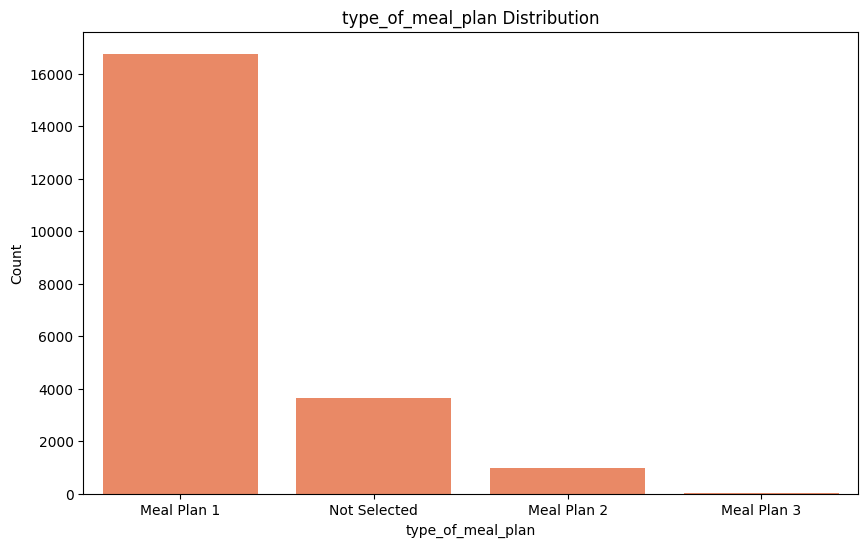

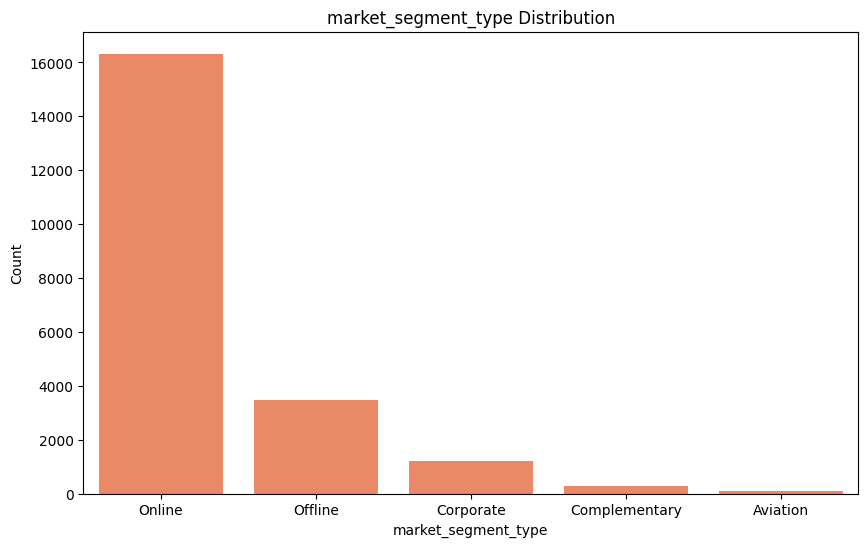

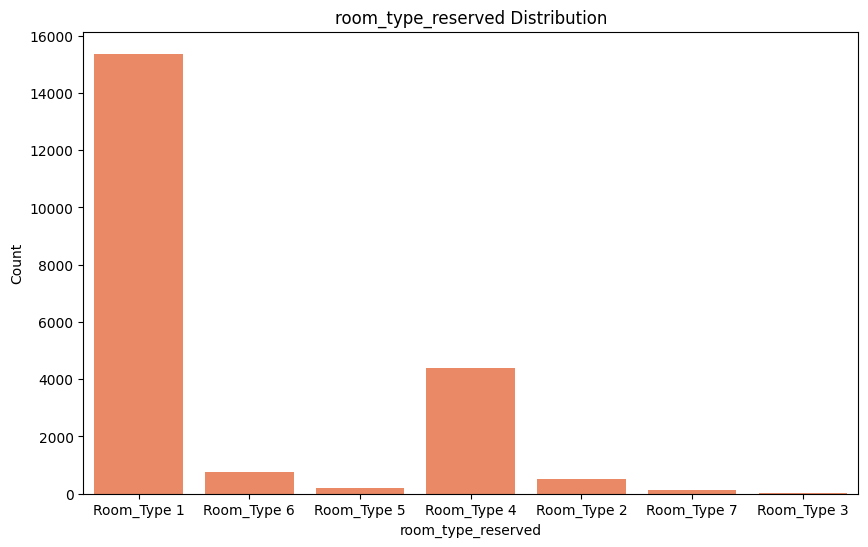

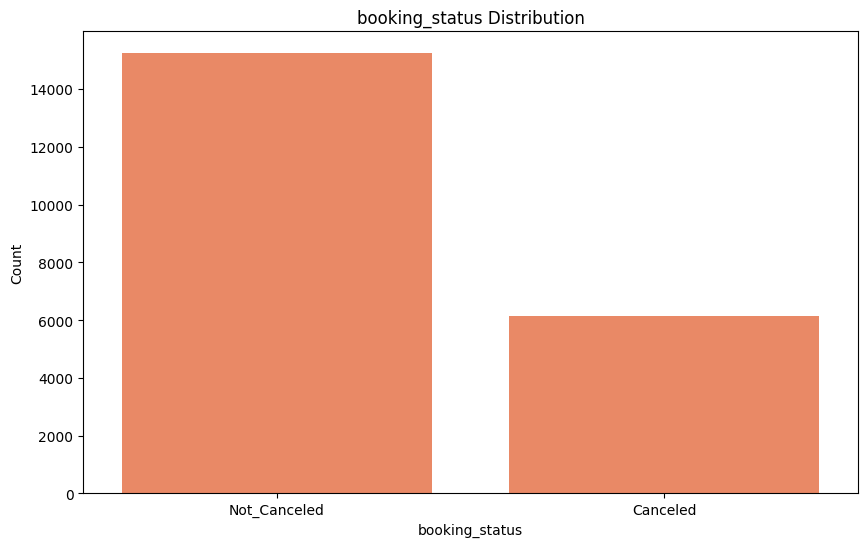

In [18]:
for cat_feature in cat_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data, x=cat_feature,color="coral")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

In [19]:
def plot_bivariate_num(df, target, num_features):
    num_plot = len(num_features)
    num_rows = (num_plot) // 2

    fig , axes = plt.subplots(num_rows, 2,figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column , ax=axes[i], data = df, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()




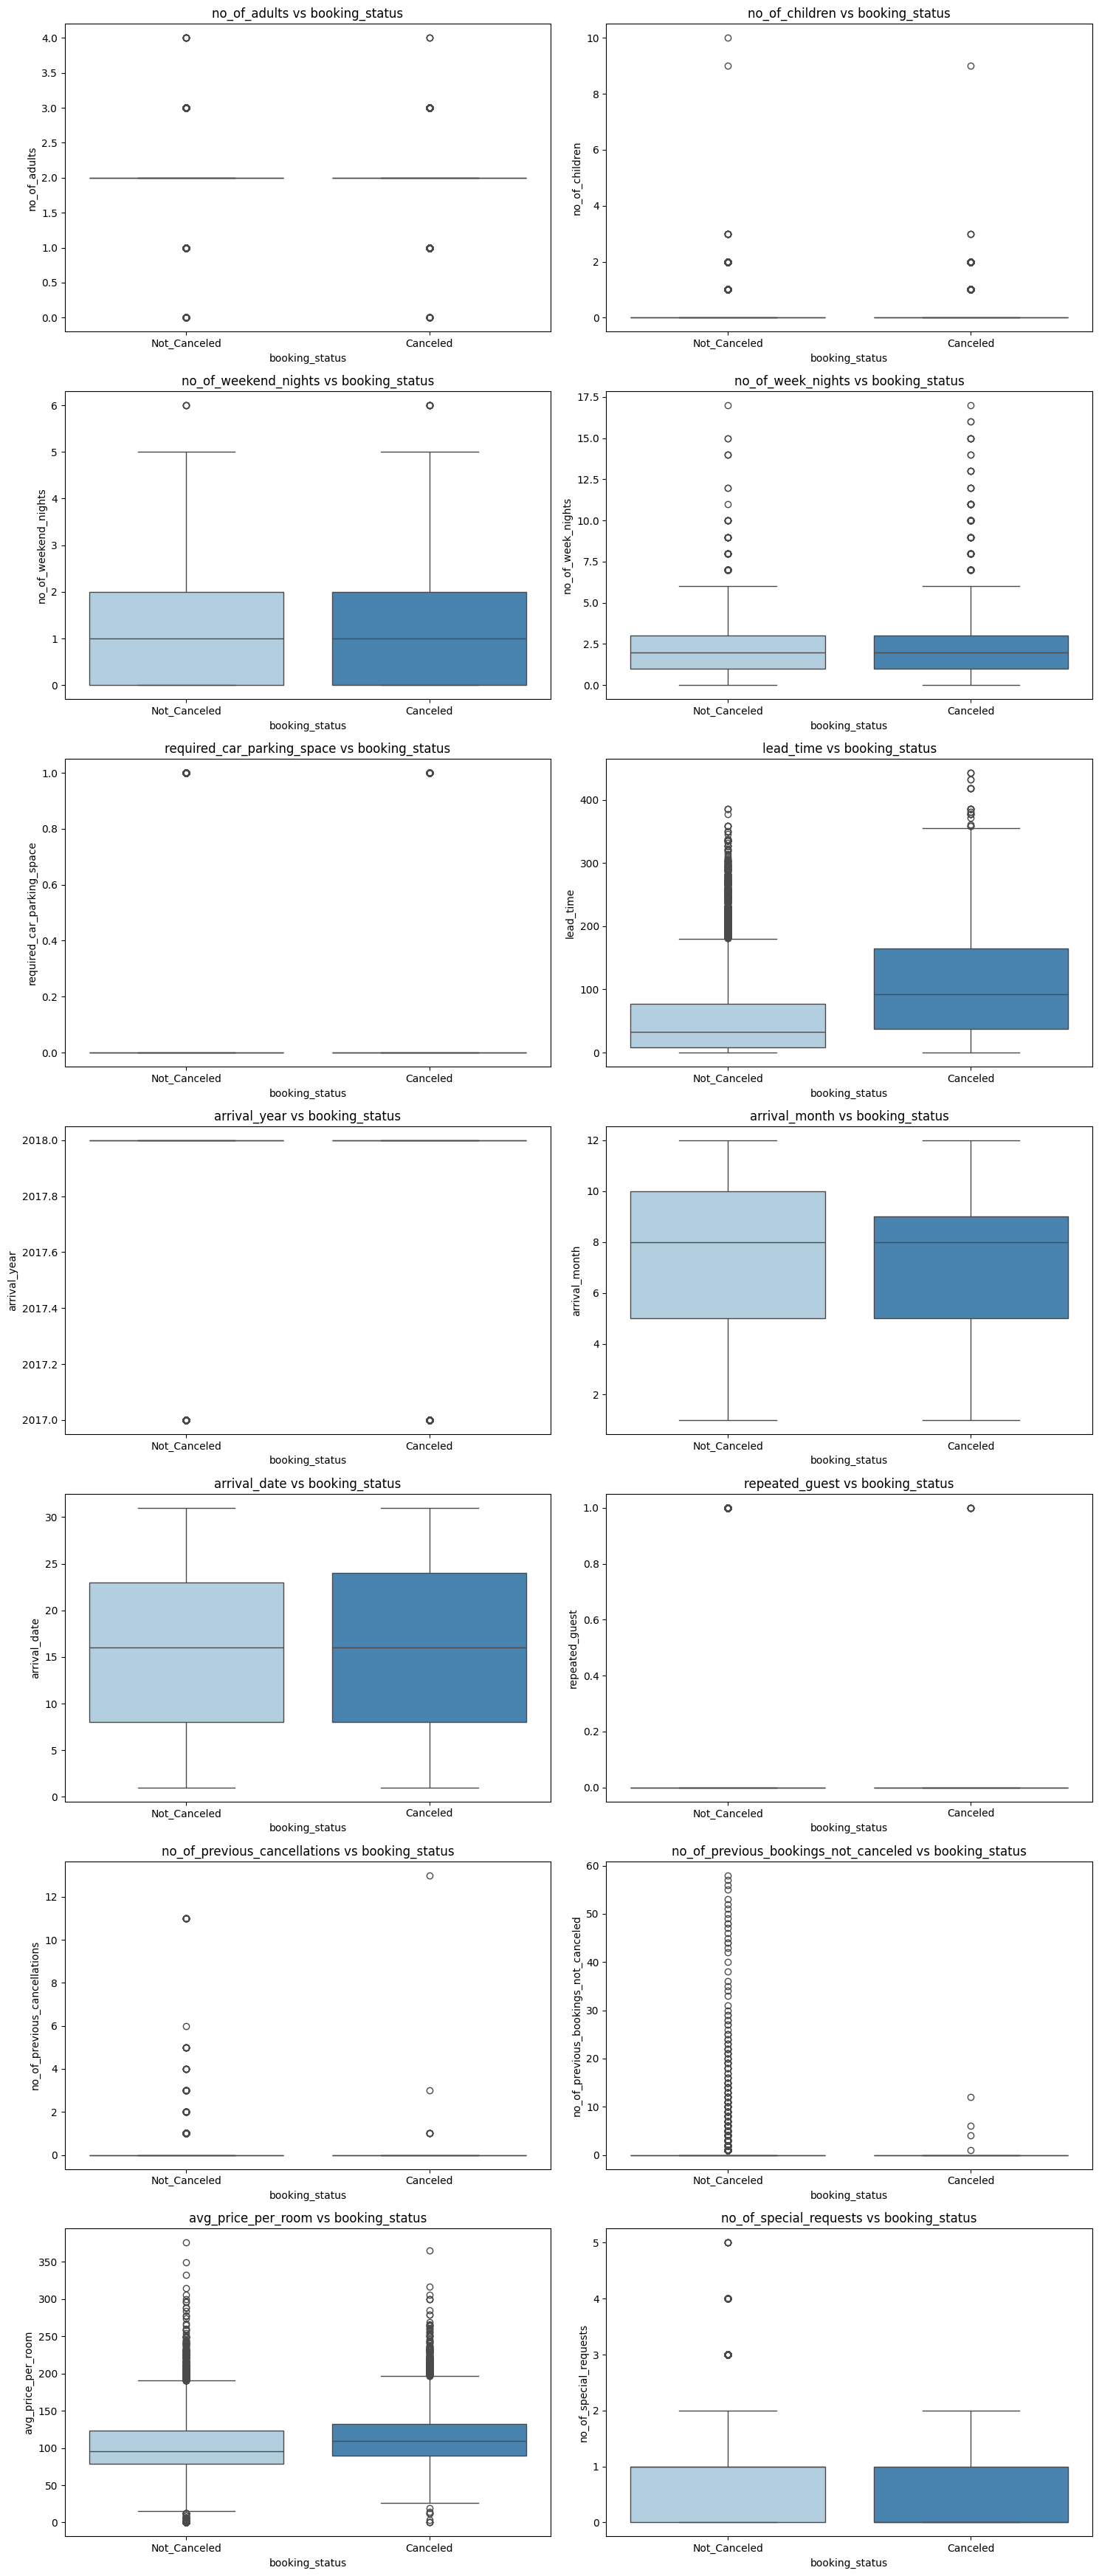

In [20]:
plot_bivariate_num(data, "booking_status", num_columns)

In [21]:
def plot_bivariate_cat(df, target, cat_feature):
    num_features = len(cat_feature)
    num_rows = (num_features) // 2

    fig , axes = plt.subplots(num_rows, 2,figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(cat_feature):
        sns.countplot(x=column,hue=target , data = df, palette="Set2",ax=axes[i])
        axes[i].set_title(f"{column} vs {target}")
        axes[i].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()
    

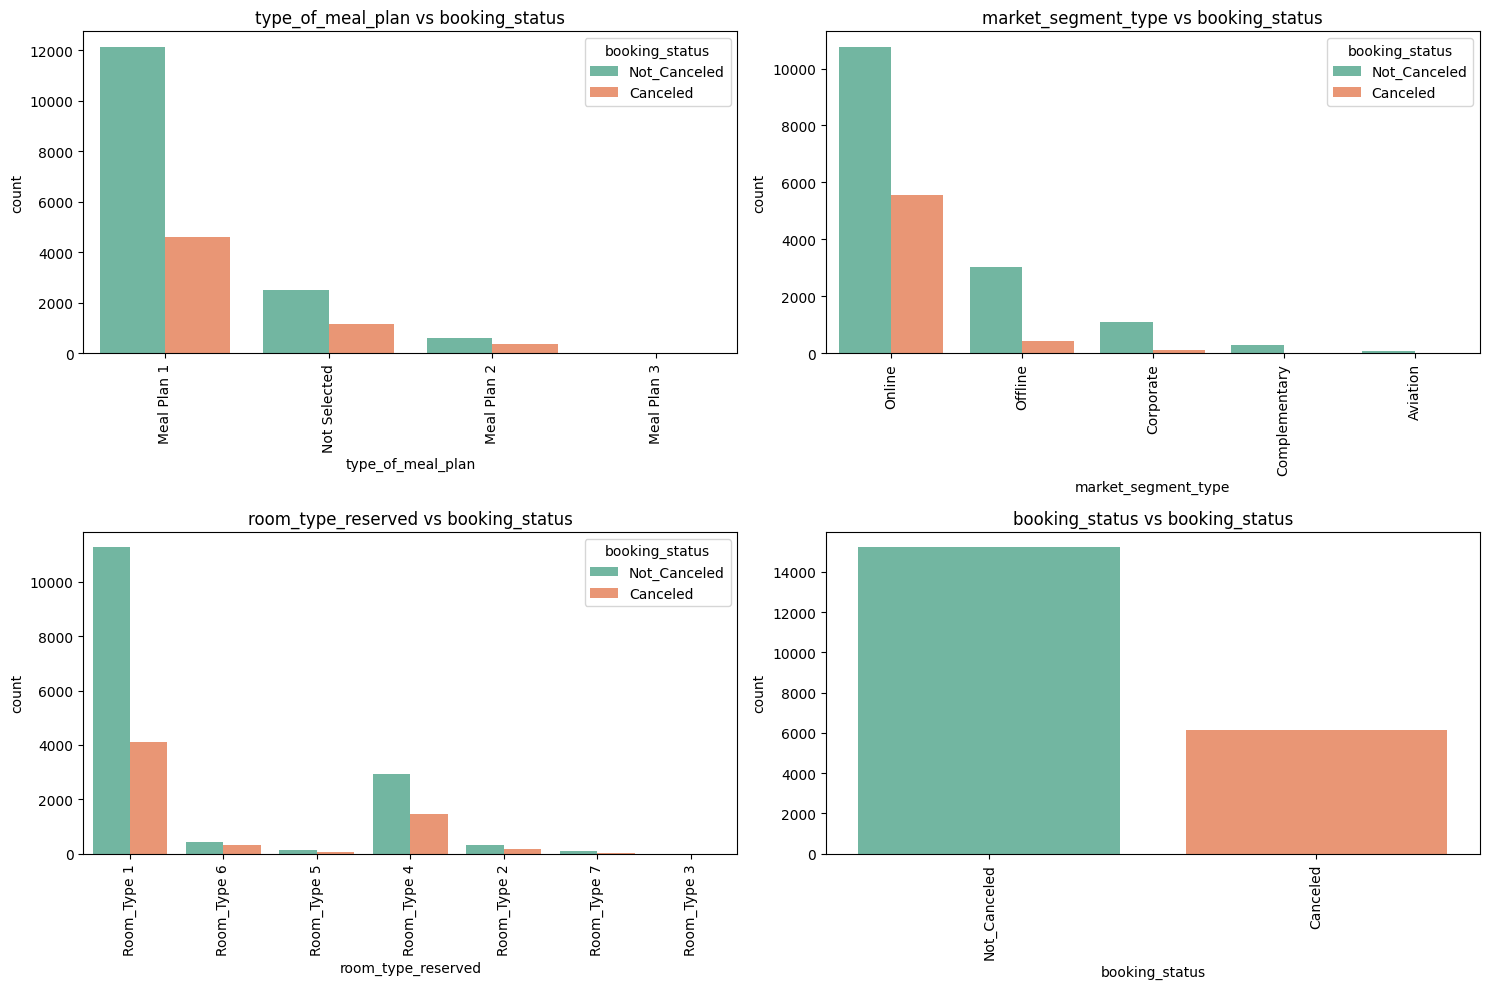

In [22]:
plot_bivariate_cat(data, "booking_status", cat_columns)

## Data Processing

In [23]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for cat_features in cat_columns:
    data[cat_features] = LE.fit_transform(data[cat_features])
    

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [26]:
X = add_constant(data)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


In [27]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


### Our data does not have any multicolinearity

In [28]:
corr = data.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

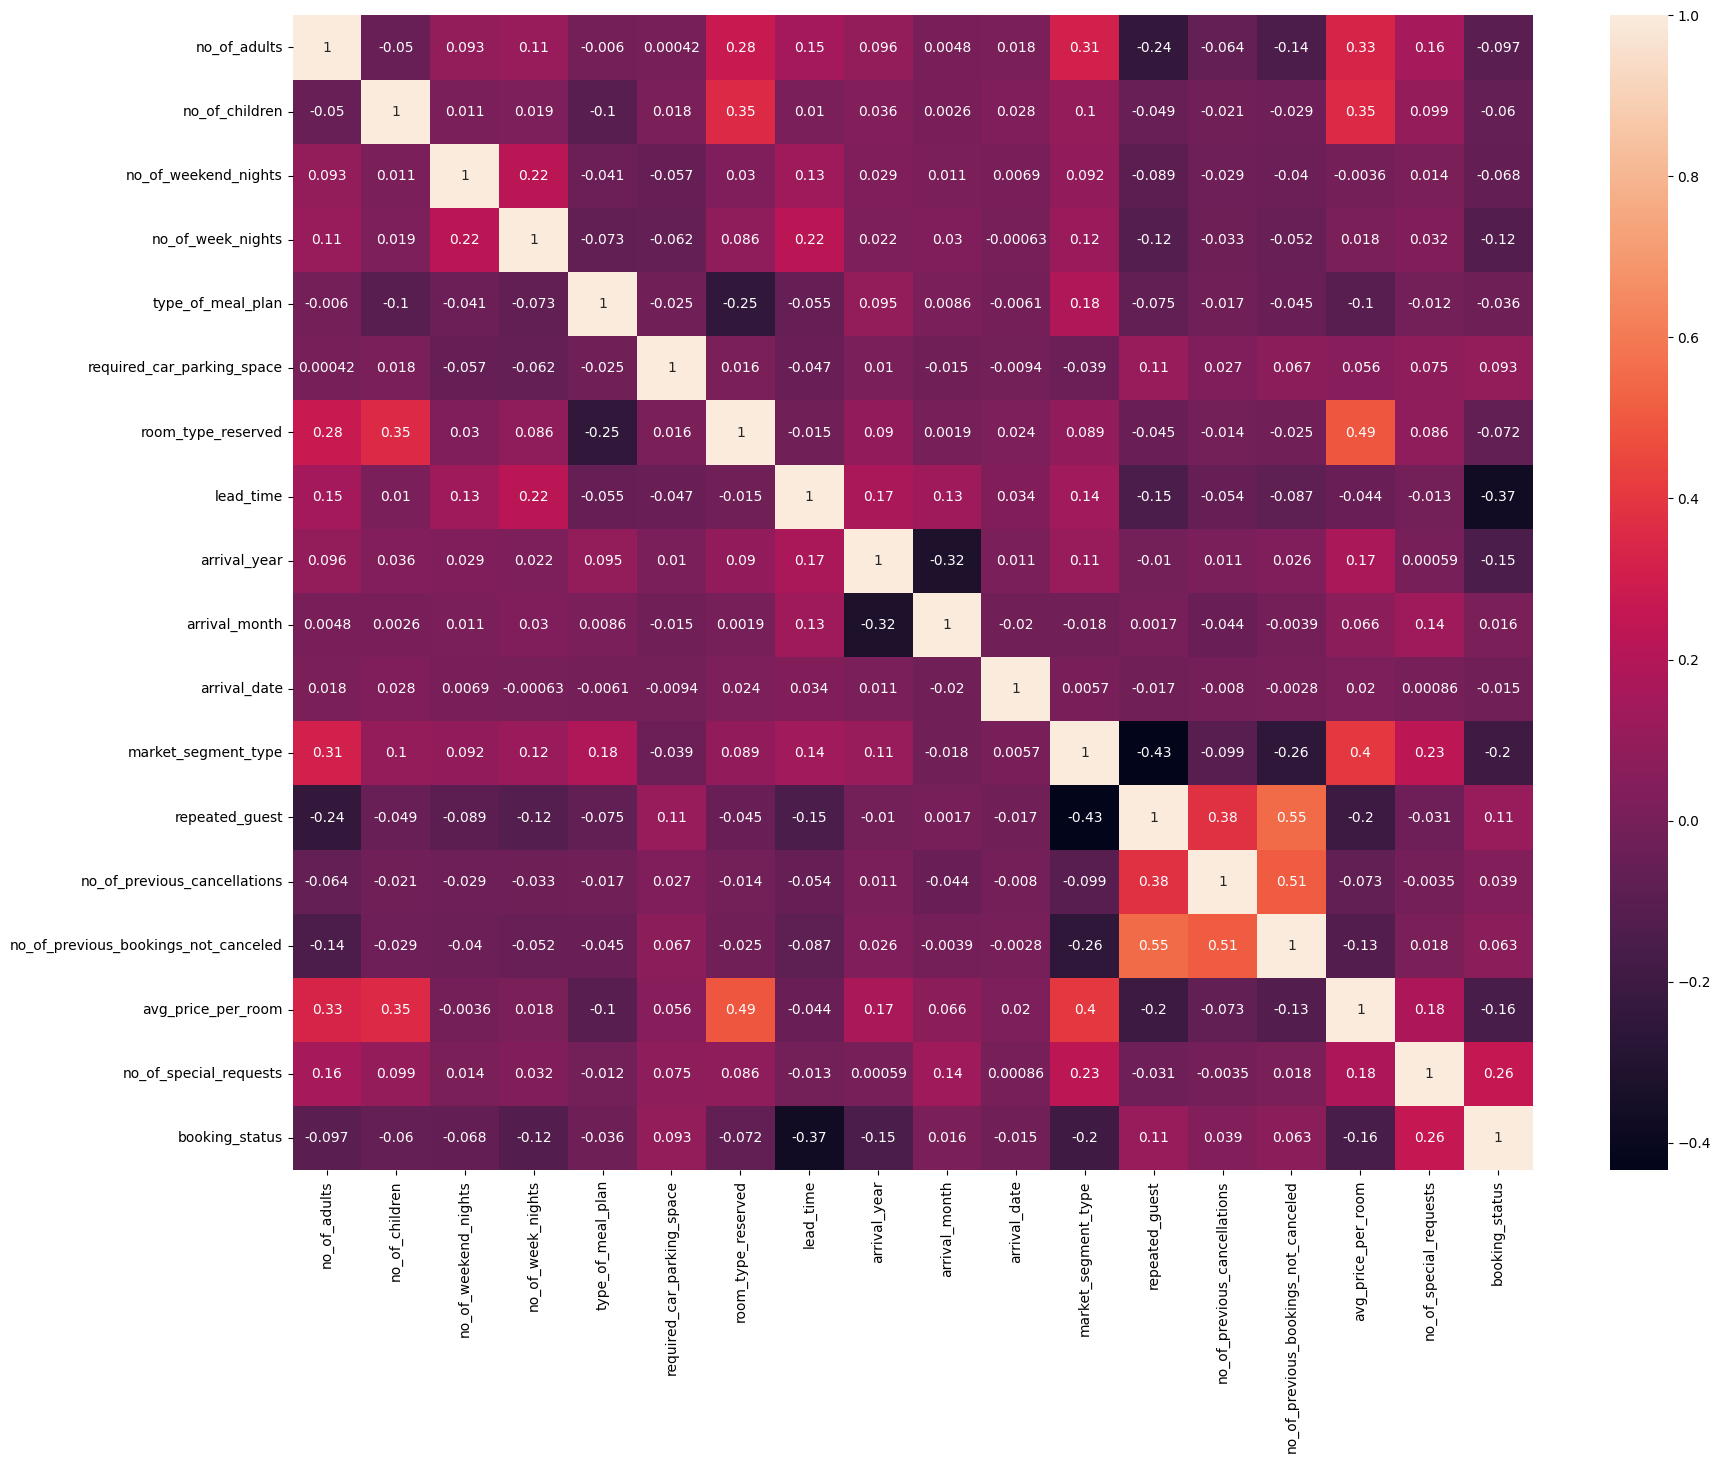

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

In [30]:
skewness = data.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [31]:
## fix the skewness

for col in data.columns:
    if skewness[col] > 5:
        data[col] = np.log1p(data[col])

In [32]:
## Imbalanced Data
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [33]:
# split the data into X and y set

X = data.drop("booking_status",axis=1)
y = data["booking_status"]

In [34]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [35]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X, y)

In [37]:
balanced_df = pd.DataFrame(X_res,columns=X.columns)
balanced_df["booking_status"] = y_res

In [38]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [39]:
balanced_df.shape

(30462, 18)

In [40]:
data = balanced_df.copy()

In [41]:
## Feature selection

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X,y)


RandomForestClassifier(random_state=42)

In [42]:
feature_importance = model.feature_importances_

In [43]:
feature_importance_df = pd.DataFrame({
    "feature" : X.columns,
    "Importance":feature_importance
})

In [44]:
top_features_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [45]:
top_10_features = top_features_df[:10]
top_10_features

,feature,Importance
7,lead_time,0.283888
15,avg_price_per_room,0.161256
16,no_of_special_requests,0.120572
10,arrival_date,0.097354
9,arrival_month,0.079493
11,market_segment_type,0.064261
3,no_of_week_nights,0.055839
2,no_of_weekend_nights,0.037834
8,arrival_year,0.021267
0,no_of_adults,0.020094


In [46]:
data_df = top_10_features.copy()

## Model Selection

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [48]:
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

In [49]:
X_train , X_test , y_train , y_test =train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
Classifier = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(random_state=42),
    "Support Vector": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "naive_bayes":GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)

}

In [51]:
metrics = {
    "Model":[],
    "Accuracy":[],
    "precision":[],
    "Recall": [],
    "f1-score": []
}

In [52]:
for model_name , classifier in Classifier.items():
    classifier.fit(X_train,y_train)

    y_preds = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_preds)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test,y_preds)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["f1-score"].append(f1)



[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [53]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,precision,Recall,f1-score
0,Random Forest,0.899557,0.900326,0.900326,0.900326
1,Logistic Regression,0.784179,0.790852,0.777199,0.783966
2,Support Vector,0.665682,0.641391,0.763192,0.697010
3,Decision Tree,0.847202,0.856381,0.837134,0.846648
4,KNN,0.780732,0.859155,0.675570,0.756382
5,naive_bayes,0.577056,0.906096,0.179153,0.299157
6,XGBoost,0.883801,0.881460,0.888925,0.885177
7,Adaboost,0.799606,0.808475,0.789251,0.798747
8,LGBM,0.878057,0.865536,0.897394,0.881177


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
rf = RandomForestClassifier()

In [57]:
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

X_train , X_test , y_train , y_test =train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
params_list ={
    "n_estimators": randint(100,500),
    "max_depth": randint(10,50),
    "min_samples_split": randint(2,10),
    "min_samples_leaf": randint(1,5),
    "bootstrap":[True,False]

}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params_list,
                                   n_iter=10,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   scoring="accuracy")


In [61]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.4s
[CV

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002636D939A30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263704A4D10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263704A4AF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002636DBDFCE0>},
                   random_state=42, scoring='accuracy', verbose=2)

0.8992286230100115